## Final Project Submission

Please fill out:
* Student name: Eyamba Ita
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [192]:
#Reading the dataset into the python notebook and evaluating the dataset
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
df = pd.read_csv('kc_house_data.csv')
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [194]:
#Suspected floors to be a categorical variable, so tested.
print(df["floors"].describe())

count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64


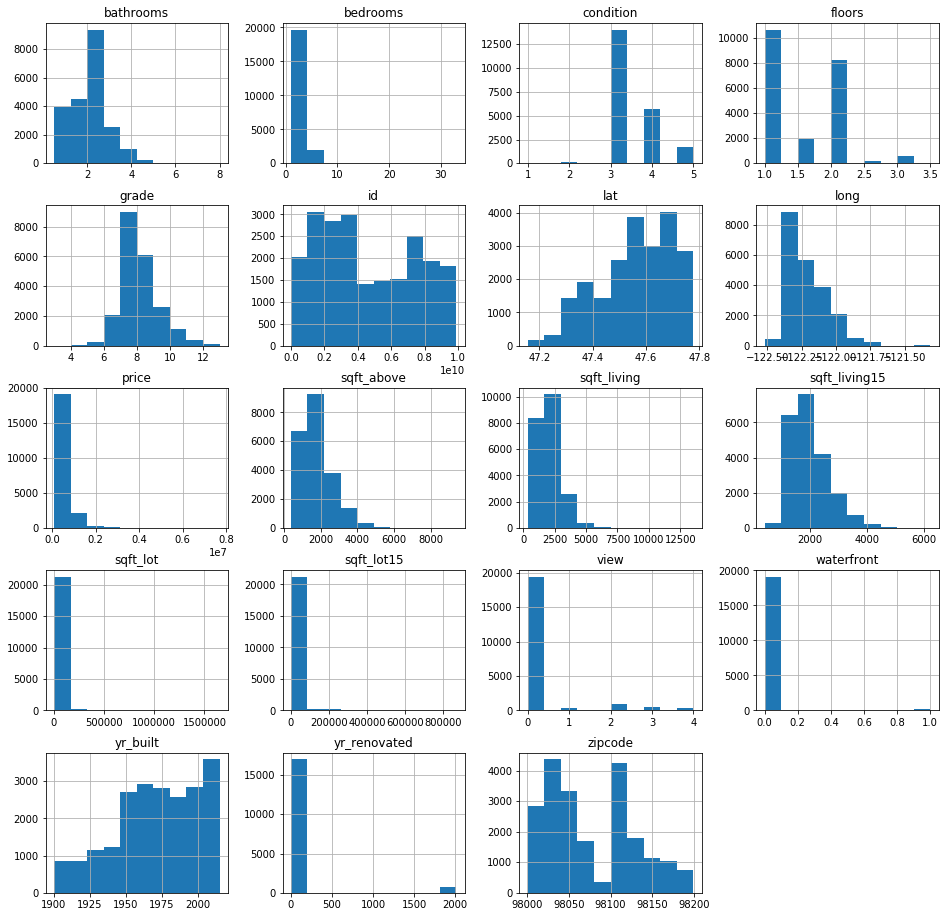

In [195]:
df.hist(figsize  = [16, 16]);

In [196]:
from sklearn.linear_model import LinearRegression

In [197]:
#dropping inconsequential data. 
#Checked range for waterfront just to be sure

#Dropping certain data just by visual evaluation
#df_clean['waterfront'].describe()
df_clean = df.drop(columns=['id','date','waterfront','view','yr_renovated','lat','long','sqft_basement'])
df_clean.head(6)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(3), int64(10)
memory usage: 2.1 MB


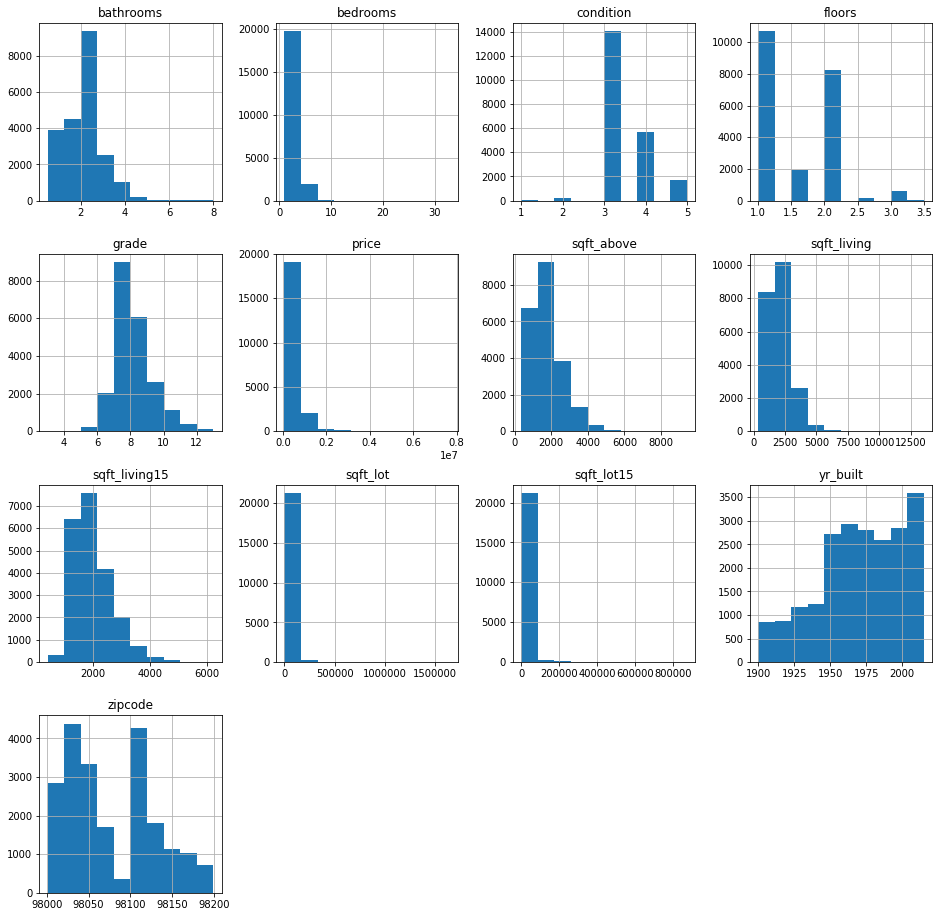

In [198]:
#Checking for skewness
df_clean.hist(figsize  = [16, 16]);

In [199]:
#Need to scale and normalize data

#acc = data["acceleration"]
logsqftab = np.log(df_clean["sqft_above"])
logsqftliv = np.log(df_clean["sqft_living"])
logsqftliv15= np.log(df_clean["sqft_living15"])
logsqftlot = np.log(df_clean["sqft_lot"])
logsqftlot15= np.log(df_clean["sqft_lot15"])
#logsqftbase= np.log(df_clean["sqft_basement"])



#scaled_acc = (acc-min(acc))/(max(acc)-min(acc))	
scaled_sqftab = (logsqftab-np.mean(logsqftab))/np.sqrt(np.var(logsqftab))
scaled_sqfliv = (logsqftliv-np.mean(logsqftliv))/np.sqrt(np.var(logsqftliv))
scaled_sqfliv15 = (logsqftliv15-np.mean(logsqftliv15))/np.sqrt(np.var(logsqftliv15))
scaled_sqflot = (logsqftlot-np.mean(logsqftlot))/np.sqrt(np.var(logsqftlot))
scaled_sqflot15 = (logsqftlot15-np.mean(logsqftlot15))/np.sqrt(np.var(logsqftlot15))
#scaled_sqfbase = (logsqftbase-np.mean(logsqftbase))/np.sqrt(np.var(logsqftbase))

data_fin = pd.DataFrame([])
data_fin = df_clean
#data_fin = df_clean.drop(columns=['sqft_above','sqft_living','sqft_living15','sqft_lot','sqft_basement','sqft_lot15'])

price = df["price"]

data_fin["sqft_above"]= scaled_sqftab
data_fin["sqft_living"]= scaled_sqfliv
data_fin["sqft_living15"]= scaled_sqfliv15
data_fin["sqft_lot"]= scaled_sqflot
data_fin["sqft_lot15"]= scaled_sqflot15
#data_fin["sqft_basement"]= scaled_sqfbase
data_fin.head()

#data_fin = pd.concat([mpg, data_fin, cyl_dummies, yr_dummies, orig_dummies], axis=1)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,-1.125582,-0.388439,1.0,3,7,-0.753583,1955,98178,-1.035453,-0.395459
1,538000.0,3,2.25,0.709463,-0.113243,2.0,3,7,0.672709,1951,98125,-0.326789,-0.024288
2,180000.0,2,1.00,-2.131943,0.244481,1.0,3,6,-1.752995,1933,98028,1.126531,0.042037
3,604000.0,4,3.00,0.070676,-0.523926,1.0,5,7,-1.026858,1965,98136,-0.990210,-0.545863
4,510000.0,3,2.00,-0.292732,0.008140,1.0,3,8,0.073516,1987,98074,-0.134221,-0.046395


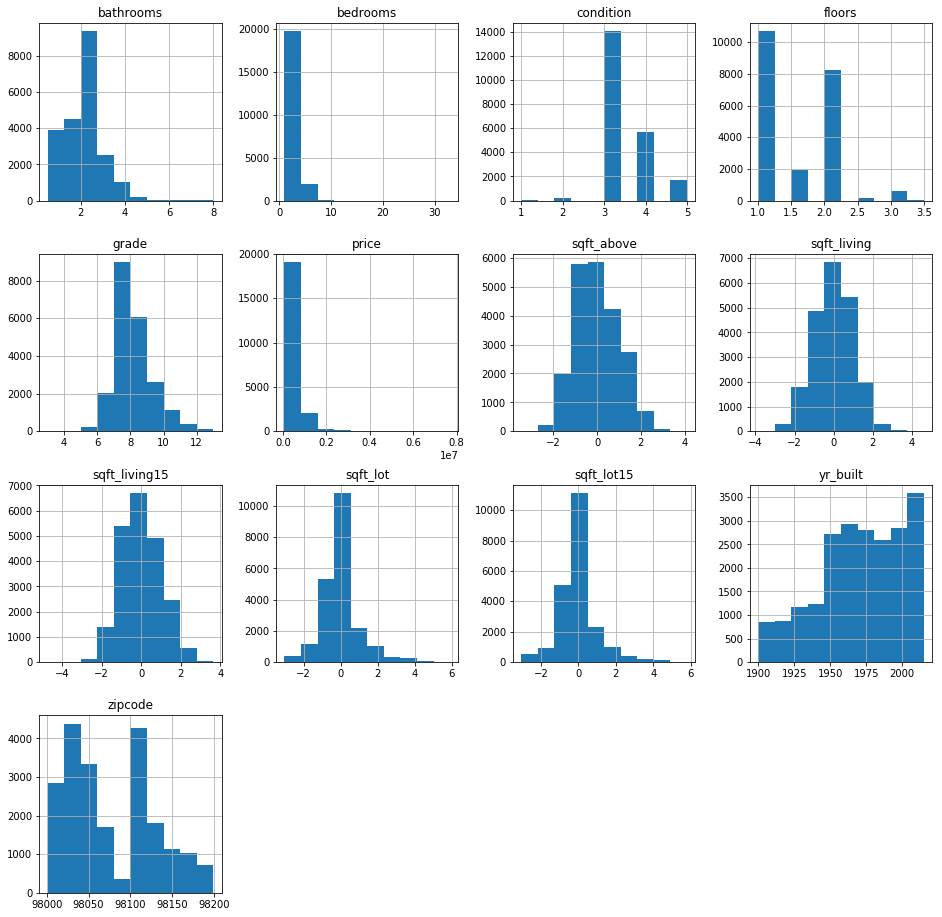

In [200]:
data_fin.hist(figsize = [16,16]);


In [201]:
#Cleaning data to remove NaNs.Peformed in retrospect after error in scikit
#Verifying theres no NaN values
#df_clean.isna().sum()
data_fin.isna().sum()
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null float64
sqft_lot         21597 non-null float64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null float64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
sqft_living15    21597 non-null float64
sqft_lot15       21597 non-null float64
dtypes: float64(8), int64(5)
memory usage: 2.1 MB


In [202]:
#Used scikit to perform regression
y = data_fin['price']
predictors = data_fin.drop('price', axis=1)
linreg1 = LinearRegression()
linreg1.fit(predictors, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [203]:
linreg1.coef_

array([-2.80103431e+04,  1.05960127e+05,  5.37623060e+04, -2.53050145e+03,
        2.56464394e+03,  2.00416074e+04,  1.67019390e+05,  3.87896645e+03,
       -4.51967021e+03,  6.21458552e+01,  3.70864000e+04, -1.14847045e+04])

In [204]:
linreg1.intercept_

1872527.592778305

In [205]:
#Verifying the score of the rsquared of the scikit regression model
linreg1.score(predictors,y)

0.5778095594791546

In [206]:
#Verifying with statsmodel
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = "price ~ bedrooms+bathrooms+sqft_living+sqft_lot+floors+condition+grade+sqft_above+yr_built+zipcode+sqft_living15+sqft_lot15"
model = ols(formula= formula, data=data_fin).fit()
model.params

Intercept        1.872528e+06
bedrooms        -2.801034e+04
bathrooms        1.059601e+05
sqft_living      5.376231e+04
sqft_lot        -2.530501e+03
floors           2.564644e+03
condition        2.004161e+04
grade            1.670194e+05
sqft_above       3.878966e+03
yr_built        -4.519670e+03
zipcode          6.214586e+01
sqft_living15    3.708640e+04
sqft_lot15      -1.148470e+04
dtype: float64

In [207]:
model.rsquared

0.5778095594791546

In [208]:
#Test predictions for both statsmodel and Scikit
#X_new = pd.DataFrame({'bedrooms': [2]})
#linreg.predict(X_new)
#linreg.predict(3,2,-2,0.1,1,3,6,-2,1975,98028,-1)

In [209]:
#Statmodel summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     2462.
Date:                Tue, 29 Jan 2019   Prob (F-statistic):               0.00
Time:                        19:23:50   Log-Likelihood:            -2.9808e+05
No. Observations:               21597   AIC:                         5.962e+05
Df Residuals:                   21584   BIC:                         5.963e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.873e+06   3.49e+06      0.537      0.591   -4.97e+06    8.71e+06
bedrooms      -2.801e+04   2325.831    -12.043      0.000   -3.26e+04   -2.35e+04
bathrooms       1.06e+05   3784.015     28.002      0.000    9.85e+04    1.13e+05
sqft_living    5.376e+04   4495.396     11.959      0.000     4.5e+04    6.26e+04
sqft_lot      -2530.5014   4266.772     -0.593      0.553   -1.09e+04    5832.687
floors         2564.6439   4670.519      0.549      0.583   -6589.918    1.17e+04
condition      2.004e+04   2752.191      7.282      0.000    1.46e+04    2.54e+04
grade           1.67e+05   2397.806     69.655      0.000    1.62e+05    1.72e+05
sqft_above     3878.9664   4165.107      0.931      0.352   -4284.951     1.2e+04
yr_built      -4519.6702     76.995    -58.700      0.000   -4670.587   -4368.753
zipcode          62.1459     35.041      1.774      0.076      -6.536     130.828
sqft_living15  3.709e+04   2704.194     13.714      0.000    3.18e+04    4.24e+04
sqft_lot15    -1.148e+04   4180.442     -2.747      0.006   -1.97e+04   -3290.729
==============================================================================
Omnibus:                    20671.329   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2630842.632
Skew:                           4.286   Prob(JB):                         0.00
Kurtosis:                      56.386   Cond. No.                     2.11e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

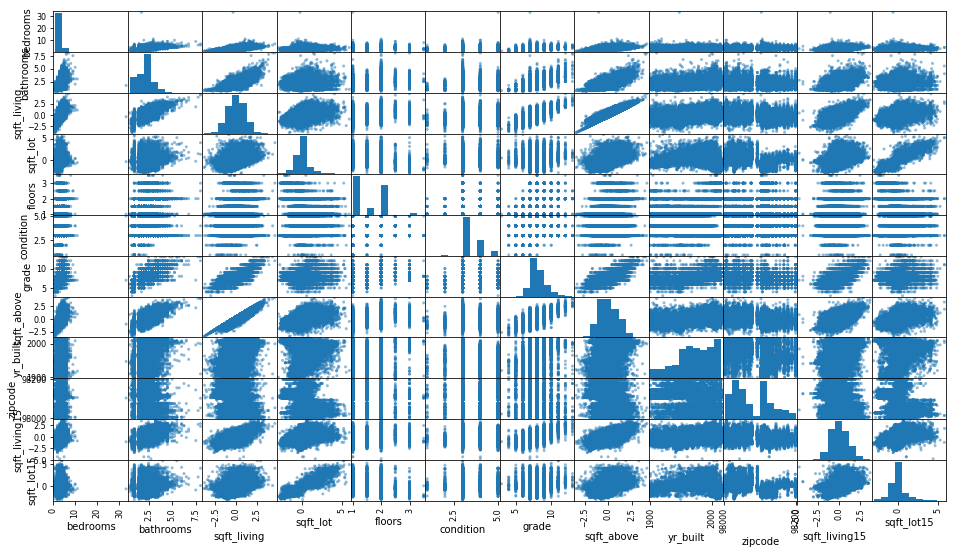

In [210]:
#Extracting variables that have highest impact on pricing to create simplified model
#recurrsive feature elimination use on model to eliminate values. All features need to be on the same scale
#Include Multi-collinearity to eliminate highly correlated features
#Build multiple models
#Perform test split

#Trying to detect for multicollinearity, predictors is a df define earlier

pd.plotting.scatter_matrix(predictors,figsize  = [16, 9]);

In [211]:
#from scikit model verifying if the datasets have any multicollinearity
predictors.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
bedrooms,1.000000,0.514508,0.621820,0.184922,0.177944,0.026496,0.356563,0.516072,0.155670,-0.154092,0.406631,0.162238
bathrooms,0.514508,1.000000,0.762135,0.100624,0.502582,-0.126479,0.665838,0.695839,0.507173,-0.204786,0.571796,0.091975
sqft_living,0.621820,0.762135,1.000000,0.325983,0.367564,-0.049620,0.743038,0.864979,0.349689,-0.222128,0.746836,0.303058
sqft_lot,0.184922,0.100624,0.325983,1.000000,-0.237460,0.073694,0.184323,0.318663,-0.007287,-0.281688,0.363743,0.918665
floors,0.177944,0.502582,0.367564,-0.237460,1.000000,-0.264075,0.458794,0.547619,0.489193,-0.059541,0.275476,-0.227223
condition,0.026496,-0.126479,-0.049620,0.073694,-0.264075,1.000000,-0.146896,-0.150730,-0.361592,0.002888,-0.089255,0.079862
grade,0.356563,0.665838,0.743038,0.184323,0.458794,-0.146896,1.000000,0.742869,0.447865,-0.185771,0.689054,0.185000
sqft_above,0.516072,0.695839,0.864979,0.318663,0.547619,-0.150730,0.742869,1.000000,0.451397,-0.290340,0.713102,0.298696
yr_built,0.155670,0.507173,0.349689,-0.007287,0.489193,-0.361592,0.447865,0.451397,1.000000,-0.347210,0.333819,0.018759
zipcode,-0.154092,-0.204786,-0.222128,-0.281688,-0.059541,0.002888,-0.185771,-0.290340,-0.347210,1.000000,-0.290355,-0.280095


In [212]:
#done to check which parameter has a higher correlation with price before dropping the other one which
#has a high collinieraty with the other
data_fin.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.611839,0.161561,0.256804,0.036056,0.667951,0.542675,0.053953,-0.053402,0.543829,0.147913
bedrooms,0.308787,1.000000,0.514508,0.621820,0.184922,0.177944,0.026496,0.356563,0.516072,0.155670,-0.154092,0.406631,0.162238
bathrooms,0.525906,0.514508,1.000000,0.762135,0.100624,0.502582,-0.126479,0.665838,0.695839,0.507173,-0.204786,0.571796,0.091975
sqft_living,0.611839,0.621820,0.762135,1.000000,0.325983,0.367564,-0.049620,0.743038,0.864979,0.349689,-0.222128,0.746836,0.303058
sqft_lot,0.161561,0.184922,0.100624,0.325983,1.000000,-0.237460,0.073694,0.184323,0.318663,-0.007287,-0.281688,0.363743,0.918665
floors,0.256804,0.177944,0.502582,0.367564,-0.237460,1.000000,-0.264075,0.458794,0.547619,0.489193,-0.059541,0.275476,-0.227223
condition,0.036056,0.026496,-0.126479,-0.049620,0.073694,-0.264075,1.000000,-0.146896,-0.150730,-0.361592,0.002888,-0.089255,0.079862
grade,0.667951,0.356563,0.665838,0.743038,0.184323,0.458794,-0.146896,1.000000,0.742869,0.447865,-0.185771,0.689054,0.185000
sqft_above,0.542675,0.516072,0.695839,0.864979,0.318663,0.547619,-0.150730,0.742869,1.000000,0.451397,-0.290340,0.713102,0.298696
yr_built,0.053953,0.155670,0.507173,0.349689,-0.007287,0.489193,-0.361592,0.447865,0.451397,1.000000,-0.347210,0.333819,0.018759


In [213]:
abs(predictors.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,True,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,True
floors,False,False,False,False,True,False,False,False,False,False,False,False
condition,False,False,False,False,False,True,False,False,False,False,False,False
grade,False,False,False,False,False,False,True,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,True,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,False,False,False
zipcode,False,False,False,False,False,False,False,False,False,True,False,False


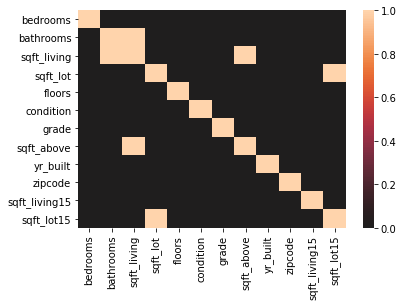

In [214]:
#Visualize the mulitcollinearity in the dataset
#only sqft_lot15 seems to have a high correlation with sqft_lot. Can remove to improve regression.
import seaborn as sns
sns.heatmap(predictors.corr() > 0.75, center=0);

In [215]:
#dropping bathrooms due to the high correlation between bathrooms and sqft living
#dropping sqft_lot15 due to high correlation between sqft_lot 15 and sqft lot, there are more that can be dropped
#from the true table

predictors_new = predictors.drop(['sqft_lot15','bathrooms'], axis=1)
predictors_new.head(2)

,bedrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,sqft_living15
0,3,-1.125582,-0.388439,1.0,3,7,-0.753583,1955,98178,-1.035453
1,3,0.709463,-0.113243,2.0,3,7,0.672709,1951,98125,-0.326789


In [216]:
#Building Model #2 after perfroming recursive feature elimination using scikit learn ie sklearn th

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 2)
selector = selector.fit(predictors_new, data_fin["price"])

In [217]:
selector.support_ 

array([False,  True, False, False, False,  True, False, False, False,
       False])

In [218]:
selector.ranking_

array([5, 1, 7, 6, 2, 1, 3, 8, 9, 4])

In [219]:
predictors_new.columns[selector.support_]

Index(['sqft_living', 'grade'], dtype='object')

In [220]:
top2 = predictors_new[predictors_new.columns[selector.support_]]

In [221]:
linreg.fit(top2,data_fin['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [222]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 94753.33713613 149145.01872149]
-601843.3698342205


In [223]:
model_2rsquared =linreg.score(top2,data_fin["price"])
model_2rsquared

0.47595589037875186

In [224]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [225]:
result = stepwise_selection(predictors, data_fin["price"], verbose = True)
print('resulting features:')
print(result)

Add  bedrooms                       with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  sqft_living                    with p-value 1.11883e-102
Add  sqft_living15                  with p-value 1.05628e-32
Add  sqft_lot15                     with p-value 4.95376e-14
Add  condition                      with p-value 2.24089e-12
resulting features:
['bedrooms', 'bathrooms', 'grade', 'yr_built', 'sqft_living', 'sqft_living15', 'sqft_lot15', 'condition']


In [226]:
#Model number 3
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = "price ~ bedrooms+bathrooms+sqft_living+ grade+sqft_living15+sqft_lot15+condition"
model_3 = ols(formula= formula, data=data_fin).fit()
model_3.params


Intercept       -802114.520718
bedrooms         -19066.961042
bathrooms         24775.907568
sqft_living       81121.965672
grade            143499.372131
sqft_living15     29507.808017
sqft_lot15       -15194.819228
condition         74901.251169
dtype: float64

In [227]:
model_3.rsquared

0.49598577884423645

In [228]:
#Performing train_test split

#df = pd.concat([price,scaled_sqftab, scaled_sqfliv, scaled_sqfliv15, scaled_sqflot,scaled_sqflot15 ], axis= 1)
df= pd.concat([price,predictors ], axis= 1)
y = df[["price"]]
X = df.drop(['price'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
df.head(3)



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,-1.125582,-0.388439,1.0,3,7,-0.753583,1955,98178,-1.035453,-0.395459
1,538000.0,3,2.25,0.709463,-0.113243,2.0,3,7,0.672709,1951,98125,-0.326789,-0.024288
2,180000.0,2,1.00,-2.131943,0.244481,1.0,3,6,-1.752995,1933,98028,1.126531,0.042037


In [229]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [230]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


In [231]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [232]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    5.832272e+10
dtype: float64
Test Mean Squarred Error: price    5.166321e+10
dtype: float64
